In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset = pd.read_excel('data testing.xlsx')
dataset.head(11)

,Jurusan,Matematika,Bahasa Inggris,Bahasa Indonesia,Prestasi Siswa,Prestasi Sekolah
0,Matematika,98,98,98,3,1
1,Matematika,80,76,65,1,2
2,Sastra Inggris,62,77,82,2,1
3,Matematika,83,82,75,1,1
4,Sastra Inggris,96,75,68,1,1
5,Matematika,91,83,84,2,2
6,Sastra Indonesia,88,80,90,2,1
7,Sastra Indonesia,84,82,88,1,1
8,Sastra Inggris,79,89,85,1,1
9,Sastra Inggris,83,88,81,2,2


In [ ]:
x = dataset.iloc [:, [2,3]].values
y = dataset.iloc [:, -1 ].values
print(x)
print(y)

[[98 98]
 [76 65]
 [77 82]
 [82 75]
 [75 68]
 [83 84]
 [80 90]
 [82 88]
 [89 85]
 [88 81]
 [85 84]]
[1 2 1 1 1 2 1 1 1 2 1]


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
print(x_train)
len(x_train)
len(x)
len(x_test)
len(y)
len(y_test)
len(y_train)

[[85 84]
 [80 90]
 [76 65]
 [82 88]
 [89 85]
 [82 75]
 [98 98]
 [83 84]]


8

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
print(x_train)

[[ 0.10042266  0.0403823 ]
 [-0.70295865  0.68649911]
 [-1.34566371 -2.00565426]
 [-0.38160613  0.47112684]
 [ 0.74312772  0.14806844]
 [-0.38160613 -0.92879291]
 [ 2.18921409  1.54798819]
 [-0.22092986  0.0403823 ]]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[2 0]
 [1 0]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


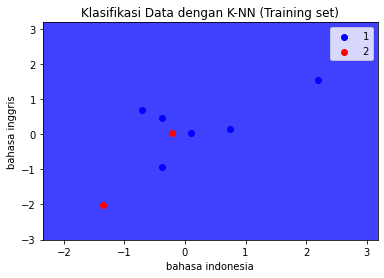

In [ ]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min()-1, stop = x_set[:, 0].max() + 1, step=0.01),
                        np.arange(start = x_set[:, 1].min()-1, stop = x_set[:, 0].max() + 1, step=0.01))
plt.contourf(x1,x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
alpha = 0.75, cmap = ListedColormap(('blue','red')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set==j,1],
    c = ListedColormap(('blue', 'red'))(i), label = j)
plt.title('Klasifikasi Data dengan K-NN (Training set)')
plt.xlabel('bahasa indonesia')
plt.ylabel('bahasa inggris')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


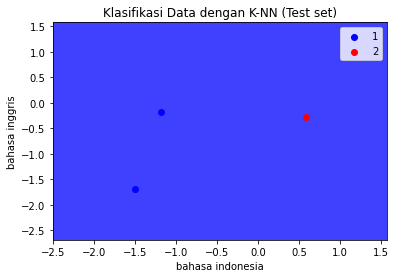

In [ ]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1,x2 = np.meshgrid(np.arange(start = x_set[:, 0].min()-1, stop = x_set[:, 0].max() + 1, step=0.01),
                    np.arange(start = x_set[:, 1].min()-1, stop = x_set[:, 0].max() + 1, step=0.01))
plt.contourf(x1,x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
            alpha = 0.75, cmap = ListedColormap(('blue','red')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set==j,1],
    c = ListedColormap(('blue', 'red'))(i), label = j)
plt.title('Klasifikasi Data dengan K-NN (Test set)')
plt.xlabel('bahasa indonesia')
plt.ylabel('bahasa inggris')
plt.legend()
plt.show()